## Matplotlib 2 μέρος

In [1]:
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np

### Πλέγμα άξονα

Με τη μέθοδο «grid» στο αντικείμενο του axis, μπορούμε να ενεργοποιήσουμε και να απενεργοποιήσουμε τις γραμμές πλέγματος. Μπορούμε επίσης να προσαρμόσουμε την εμφάνιση των γραμμών πλέγματος χρησιμοποιώντας τα ίδια ορίσματα λέξεων-κλειδιών με τη συνάρτηση «plot»:

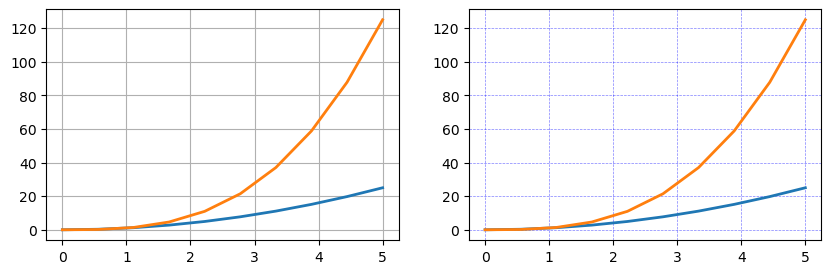

In [3]:
x = np.linspace(0, 5, 10)
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# προεπιλεγμένη εμφάνιση πλέγματος
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# προσαρμοσμένη εμφάνιση πλέγματος
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Δίδυμοι άξονες

Μερικές φορές είναι χρήσιμο να έχουμε διπλούς άξονες x ή y σε ένα σχήμα. για παράδειγμα, όταν σχεδιάζετε καμπύλες με διαφορετικές μονάδες μαζί. Το Matplotlib το υποστηρίζει με τις συναρτήσεις «twinx» και «twiny»:

Text(0, 0.5, 'volume $(m^3)$')

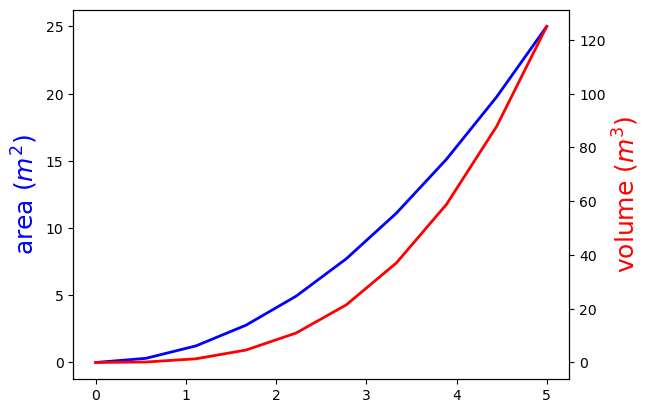

In [4]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
    
ax2 = ax1.twinx()

ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")


### Άλλα στυλ δισδιάστατων γραφημάτων 

Εκτός από την κανονική μέθοδο «plot», υπάρχει μια σειρά από άλλες συναρτήσεις  για τη δημιουργία διαφορετικών ειδών γραφικών παραστάσεων. Δείτε τη συλλογή γραφημάτων της matplotlib για μια πλήρη λίστα:
http://matplotlib.org/gallery.html 

Μερικά από τα πιο χρήσιμα φαίνονται παρακάτω:

In [3]:
n = np.array([0,1,2,3,4,5])

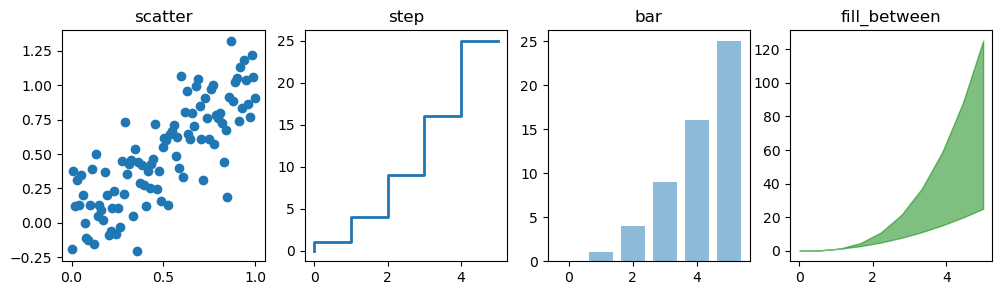

In [6]:
xx = np.linspace(0, 1, 100)

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.75, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

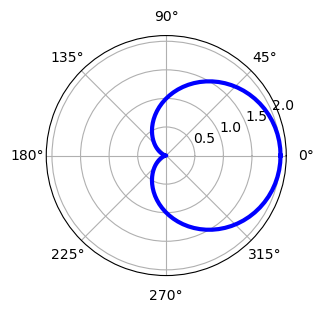

In [99]:
# γράφημα πολικών συντεταγμένων χρησιμοποιώντας add_axes και πολική προβολή
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, 0.5, 0.5], polar=True)
theta = np.linspace(0, 2 * np.pi, 100)
r = 1 + np.cos(theta)
ax.plot(theta, r, color='blue', lw=3);

### Πληροφορίες γραφήματος 

Πληροφορία γραφήματος της matplotlib μπορεί να γίνει χρησιμοποιώντας τη συνάρτηση `text`. Υποστηρίζει μορφοποίηση LaTeX όπως τα κείμενα και οι τίτλοι ετικετών αξόνων:

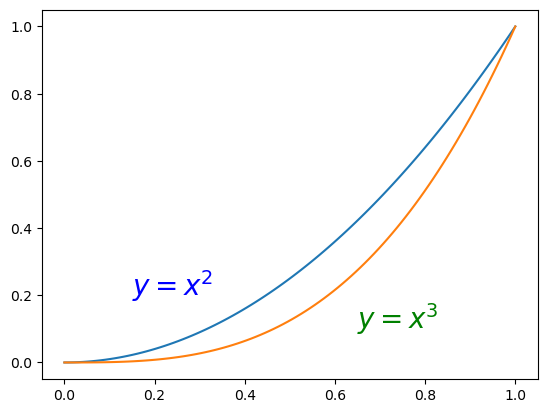

In [100]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### Γραφήματα με πολλαπλά επιμέρους γραφήματα και ένθετα

Οι άξονες μπορούν να προστεθούν σε έναν καμβά matplotlib  με μη αυτόματο τρόπο χρησιμοποιώντας το "fig.add_axes" ή χρησιμοποιώντας έναν διαχειριστή διάταξης δευτερεύοντος σχήματος όπως "subplots", "subplot2grid" ή "gridspec":

#### Subplots

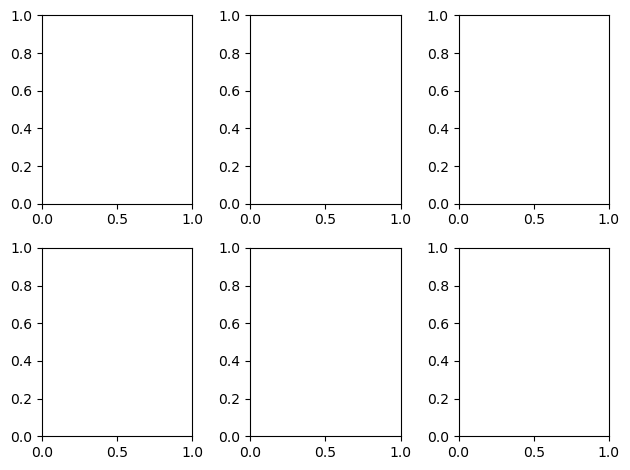

In [101]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

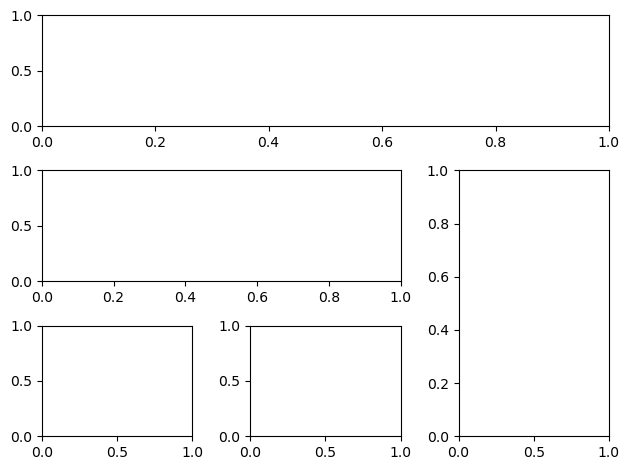

In [102]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### add_axes

Η μη αυτόματη προσθήκη αξόνων με "add_axes" είναι χρήσιμη για την προσθήκη ένθετων σε σχήματα:

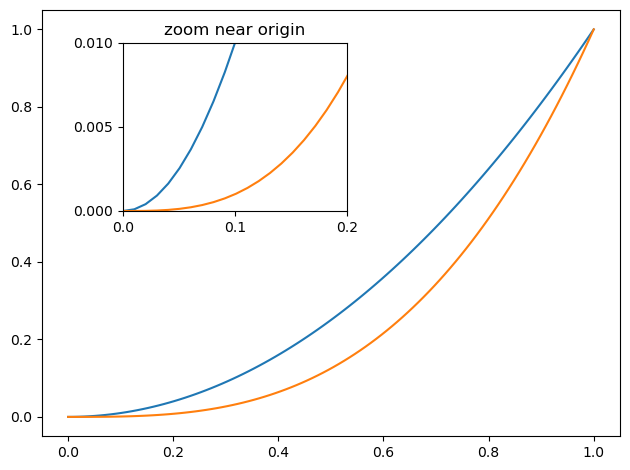

In [103]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# ένθεση
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, πλάτος, ύψος

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# καθορισμός εύρους αξόνων
inset_ax.set_xlim(0, .2)
inset_ax.set_ylim(0, .01)

# ορισμός σημείων (ticks) στον άξονα
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([0,0.1,0.2]);

## Τρισδιάστατα γραφήματα

Για να χρησιμοποιήσουμε τρισδιάστατα γραφικά στο matplotlib, πρέπει πρώτα να δημιουργήσουμε ένα στιγμιότυπο της κλάσης «Axes3D». Οι τρισδιάστατοι άξονες μπορούν να προστεθούν σε έναν καμβά γραφημάτων matplotlib με τον ίδιο ακριβώς τρόπο όπως οι 2D άξονες. ή, πιο βολικά, περνώντας ένα όρισμα λέξης-κλειδιού `projection='3d'` στις μεθόδους `add_axes` ή `add_subplot`.

#### Γραφήματα επιφανειών

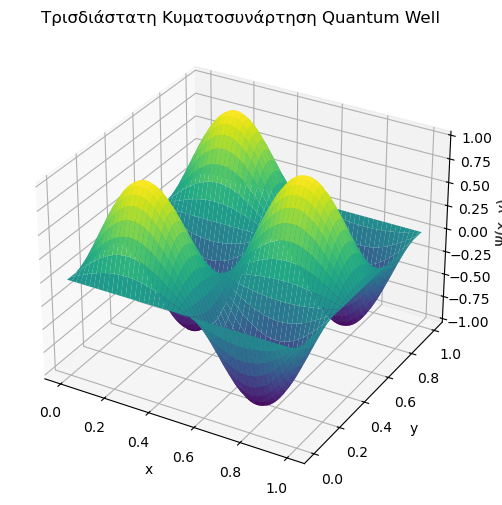

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Ορισμός των παραμέτρων
L = 1  # Μήκος του πηγαδιού
m, n = 2, 3  # Κβαντικοί αριθμοί

# Δημιουργία πλέγματος τιμών
x = np.linspace(0, L, 100)
y = np.linspace(0, L, 100)
X, Y = np.meshgrid(x, y)

# Υπολογισμός της κυματοσυνάρτησης
Psi = np.sin(m * np.pi * X / L) * np.sin(n * np.pi * Y / L)

# Δημιουργία τρισδιάστατης απεικόνισης
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # Χρήση της υπάρχουσας ρύθμισης για 3D
ax.plot_surface(X, Y, Psi, cmap='viridis')

# Προσθήκη ετικετών
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("Ψ(x, y)")
ax.set_title("Τρισδιάστατη Κυματοσυνάρτηση Quantum Well")

plt.show()


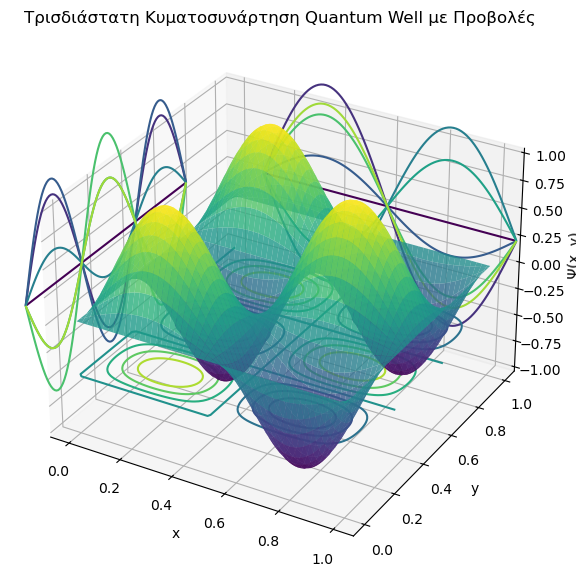

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Ορισμός των παραμέτρων
L = 1  # Μήκος του πηγαδιού
m, n = 2, 3  # Κβαντικοί αριθμοί

# Δημιουργία πλέγματος τιμών
x = np.linspace(0, L, 100)
y = np.linspace(0, L, 100)
X, Y = np.meshgrid(x, y)

# Υπολογισμός της κυματοσυνάρτησης
Psi = np.sin(m * np.pi * X / L) * np.sin(n * np.pi * Y / L)

# Δημιουργία τρισδιάστατης απεικόνισης
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # Χρήση της υπάρχουσας ρύθμισης για 3D
ax.plot_surface(X, Y, Psi, cmap='viridis', alpha=0.8)

# Προβολές στους άξονες
ax.contour(X, Y, Psi, zdir='z', offset=-0.5, cmap='viridis')  # Προβολή στο επίπεδο xy
ax.contour(X, Y, Psi, zdir='x', offset=-0.2, cmap='viridis')  # Προβολή στο yz
ax.contour(X, Y, Psi, zdir='y', offset=1.2, cmap='viridis')   # Προβολή στο xz

# Προσθήκη ετικετών
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("Ψ(x, y)")
ax.set_title("Τρισδιάστατη Κυματοσυνάρτηση Quantum Well με Προβολές")

plt.show()


## Περαιτέρω ανάγνωση

* http://www.matplotlib.org - Η ιστοσελίδα του έργου για το matplotlib.
* https://github.com/matplotlib/matplotlib - Ο πηγαίος κώδικας για το matplotlib.
* http://matplotlib.org/gallery.html - Μια μεγάλη γκαλερί που παρουσιάζει διάφορους τύπους πλοκών που μπορεί να δημιουργήσει η matplotlib. Συνιστάται ανεπιφύλακτα!
* http://www.loria.fr/~rougier/teaching/matplotlib - Ένα καλό μάθημα matplotlib.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Μια άλλη καλή αναφορά στο matplotlib.
